In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
DATA_PATH ="/content/drive/MyDrive/test"

In [4]:
train_dir = "/content/drive/MyDrive/test"

image_types = []

for i in os.listdir(train_dir):
    image_types.append(i)

print("Types of images in dataset: ")
print(image_types)

Types of images in dataset: 
['truck', 'frog', 'dog', 'horse', 'deer', 'cat', 'ship', 'airplane', 'automobile', 'bird']


In [5]:
train_data = []

for i in image_types:
    train_path = os.path.join(train_dir, i)
    class_type = i
    for image in tqdm(os.listdir(train_path)):
        train_data_arr = cv2.imread(os.path.join(train_path, image))
        grayscale_image_arr = cv2.cvtColor(train_data_arr, cv2.COLOR_BGR2GRAY)
        train_data.append([grayscale_image_arr, class_type])

100%|██████████| 1000/1000 [00:10<00:00, 94.87it/s]


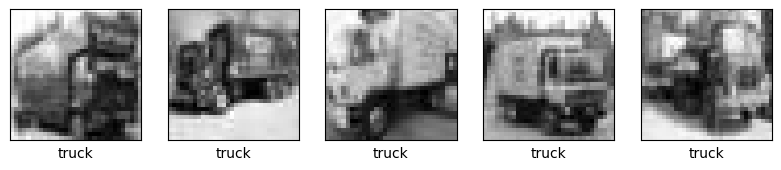

In [6]:
plt.figure(figsize=(20,5))
for i in range(5):
	plt.subplot(2,10,i+1)
	plt.imshow(train_data[i][0], cmap="gray")
	plt.xticks([])
	plt.yticks([])
	plt.xlabel(f"{train_data[i][1]}")
plt.show()

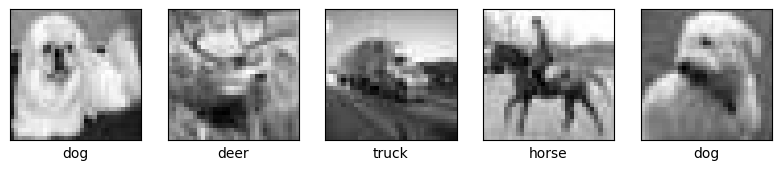

In [7]:
random.shuffle(train_data)

plt.figure(figsize=(20,5))
for i in range(5):
	plt.subplot(2,10,i+1)
	plt.imshow(train_data[i][0], cmap="gray")
	plt.xticks([])
	plt.yticks([])
	plt.xlabel(f"{train_data[i][1]}")
plt.show()

Fold 0 K = 1 Manhattan (L1) Accuracy: 0.185
Fold 0 K = 1 Euclidean (L2) Accuracy: 0.175
Fold 1 K = 1 Manhattan (L1) Accuracy: 0.165
Fold 1 K = 1 Euclidean (L2) Accuracy: 0.165
Fold 2 K = 1 Manhattan (L1) Accuracy: 0.175
Fold 2 K = 1 Euclidean (L2) Accuracy: 0.195
Fold 3 K = 1 Manhattan (L1) Accuracy: 0.165
Fold 3 K = 1 Euclidean (L2) Accuracy: 0.19
Fold 4 K = 1 Manhattan (L1) Accuracy: 0.215
Fold 4 K = 1 Euclidean (L2) Accuracy: 0.2
Fold 0 K = 2 Manhattan (L1) Accuracy: 0.145
Fold 0 K = 2 Euclidean (L2) Accuracy: 0.145
Fold 1 K = 2 Manhattan (L1) Accuracy: 0.14
Fold 1 K = 2 Euclidean (L2) Accuracy: 0.165
Fold 2 K = 2 Manhattan (L1) Accuracy: 0.19
Fold 2 K = 2 Euclidean (L2) Accuracy: 0.12
Fold 3 K = 2 Manhattan (L1) Accuracy: 0.135
Fold 3 K = 2 Euclidean (L2) Accuracy: 0.175
Fold 4 K = 2 Manhattan (L1) Accuracy: 0.185
Fold 4 K = 2 Euclidean (L2) Accuracy: 0.185
Fold 0 K = 3 Manhattan (L1) Accuracy: 0.195
Fold 0 K = 3 Euclidean (L2) Accuracy: 0.155
Fold 1 K = 3 Manhattan (L1) Accuracy: 

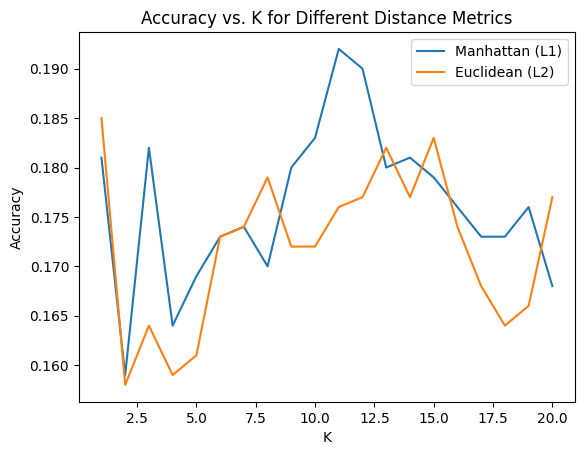

In [8]:
f0 = train_data[0:200]
f1 = train_data[200:400]
f2 = train_data[400:600]
f3 = train_data[600:800]
f4 = train_data[800:1000]

k_values = range(1, 21)
accuracies_l1 = []
accuracies_l2 = []
top_predictions_l1 = []
top_predictions_l2 = []

for k in k_values:
    fold_accuracies_l1 = []
    fold_accuracies_l2 = []
    fold_predictions_l1 = []
    fold_predictions_l2 = []

    for i in range(5):
        if i == 0:
            train = f1 + f2 + f3 + f4
            validation = f0
        elif i == 1:
            train = f0 + f2 + f3 + f4
            validation = f1
        elif i == 2:
            train = f1 + f0 + f3 + f4
            validation = f2
        elif i == 3:
            train = f1 + f2 + f0 + f4
            validation = f3
        elif i == 4:
            train = f1 + f2 + f3 + f0
            validation = f4

        correct_l1 = 0
        correct_l2 = 0
        total = 0
        predictions_l1 = []
        predictions_l2 = []

        for v in validation:
            distances_l1 = []
            distances_l2 = []

            for t in train:
                l1_dist = np.sum(np.abs(t[0] - v[0]))
                l2_dist = np.sqrt(np.sum((t[0] - v[0]) ** 2))
                distances_l1.append((l1_dist, t[1]))
                distances_l2.append((l2_dist, t[1]))

            distances_l1.sort()
            distances_l2.sort()

            neighbors_l1 = [dist[1] for dist in distances_l1[:k]]
            neighbors_l2 = [dist[1] for dist in distances_l2[:k]]

            prediction_l1 = max(set(neighbors_l1), key=neighbors_l1.count)
            prediction_l2 = max(set(neighbors_l2), key=neighbors_l2.count)

            if prediction_l1 == v[1]:
                correct_l1 += 1
            if prediction_l2 == v[1]:
                correct_l2 += 1

            total += 1

            top_k_predictions_l1 = [dist[1] for dist in distances_l1[:5]]
            top_k_predictions_l2 = [dist[1] for dist in distances_l2[:5]]
            predictions_l1.append(top_k_predictions_l1)
            predictions_l2.append(top_k_predictions_l2)

        accuracy_l1 = correct_l1 / total
        accuracy_l2 = correct_l2 / total

        fold_accuracies_l1.append(accuracy_l1)
        fold_accuracies_l2.append(accuracy_l2)
        fold_predictions_l1.append(predictions_l1)
        fold_predictions_l2.append(predictions_l2)

        print("Fold", i, "K =", k, "Manhattan (L1) Accuracy:", accuracy_l1)
        print("Fold", i, "K =", k, "Euclidean (L2) Accuracy:", accuracy_l2)

    accuracies_l1.append(fold_accuracies_l1)
    accuracies_l2.append(fold_accuracies_l2)
    top_predictions_l1.append(fold_predictions_l1)
    top_predictions_l2.append(fold_predictions_l2)


accuracies_l1 = np.array(accuracies_l1)
accuracies_l2 = np.array(accuracies_l2)


avg_accuracies_l1 = np.mean(accuracies_l1, axis=1)
avg_accuracies_l2 = np.mean(accuracies_l2, axis=1)


plt.plot(k_values, avg_accuracies_l1, label="Manhattan (L1)")
plt.plot(k_values, avg_accuracies_l2, label="Euclidean (L2)")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. K for Different Distance Metrics")
plt.legend()
plt.show()


fold_index = 0
validation_index = 0
top_5_predictions_l1 = top_predictions_l1[fold_index][validation_index]
top_5_predictions_l2 = top_predictions_l2[fold_index][validation_index]

In [9]:
print("Top 5 Predictions (Manhattan - L1):")
for i, prediction in enumerate(top_5_predictions_l1[:5]):
    print(f"Prediction {i+1}: Class {prediction}")

print("")

print("Top 5 Predictions (Euclidean - L2):")
for i, prediction in enumerate(top_5_predictions_l2[:5]):
    print(f"Prediction {i+1}: Class {prediction}")

Top 5 Predictions (Manhattan - L1):
Prediction 1: Class ['airplane', 'dog', 'airplane', 'airplane', 'bird']
Prediction 2: Class ['airplane', 'dog', 'airplane', 'airplane', 'airplane']
Prediction 3: Class ['bird', 'ship', 'cat', 'truck', 'deer']
Prediction 4: Class ['airplane', 'airplane', 'ship', 'bird', 'airplane']
Prediction 5: Class ['airplane', 'bird', 'airplane', 'airplane', 'deer']

Top 5 Predictions (Euclidean - L2):
Prediction 1: Class ['ship', 'automobile', 'truck', 'automobile', 'airplane']
Prediction 2: Class ['bird', 'dog', 'ship', 'horse', 'frog']
Prediction 3: Class ['airplane', 'deer', 'truck', 'deer', 'frog']
Prediction 4: Class ['bird', 'airplane', 'airplane', 'airplane', 'truck']
Prediction 5: Class ['airplane', 'bird', 'deer', 'bird', 'frog']


In this assignment, our exclusive focus was on applying the K-nearest neighbors (KNN) algorithm to the CIFAR-10 test dataset. Our primary goal was to assess the performance of two specific distance metrics, namely Manhattan (L1) and Euclidean (L2). Our analysis was confined to the CIFAR-10 test set, which encompasses 10,000 grayscale images distributed across ten distinct categories.

The choice of a distance metric holds paramount significance when deploying the K-nearest neighbors (KNN) algorithm for classification. In our particular case, we carefully considered the application of both Manhattan (L1) and Euclidean (L2) distances. The Manhattan distance measures the cumulative absolute disparities between corresponding elements of two vectors, while the Euclidean distance calculates the square root of the sum of squared disparities between these elements. Our experimental results unveiled discernible differences in the performance of Manhattan and Euclidean distances when applied to the grayscale CIFAR-10 dataset. It is imperative to select the appropriate distance metric based on the dataset's characteristics, feature attributes, and class intricacies.

Manhattan distance excels in scenarios marked by linearly related features or datasets that contain outliers. It exhibits a higher resilience to the influence of outliers when compared to the Euclidean distance metric. Conversely, the performance of the Euclidean distance metric hinges on the magnitude of feature disparities and assumes a normal distribution of features, rendering it well-suited for datasets that adhere to these assumptions. Given the characteristics of the CIFAR-10 dataset, presented in grayscale as a representation of original color images, the suitability of the Manhattan distance metric becomes readily apparent. Grayscale images generally convey less complex information compared to their color counterparts, with the linear relationship among pixel intensities playing a more prominent role in class differentiation. In conclusion, the results of our model training experiment strongly advocate for the preference of Manhattan distance over Euclidean distance, as clearly demonstrated in the accompanying chart.